# Sales Prediction Model #

In [36]:
#importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


__From above table we can conclude that data is already clean so we can proceed further__

## Visualisation of data

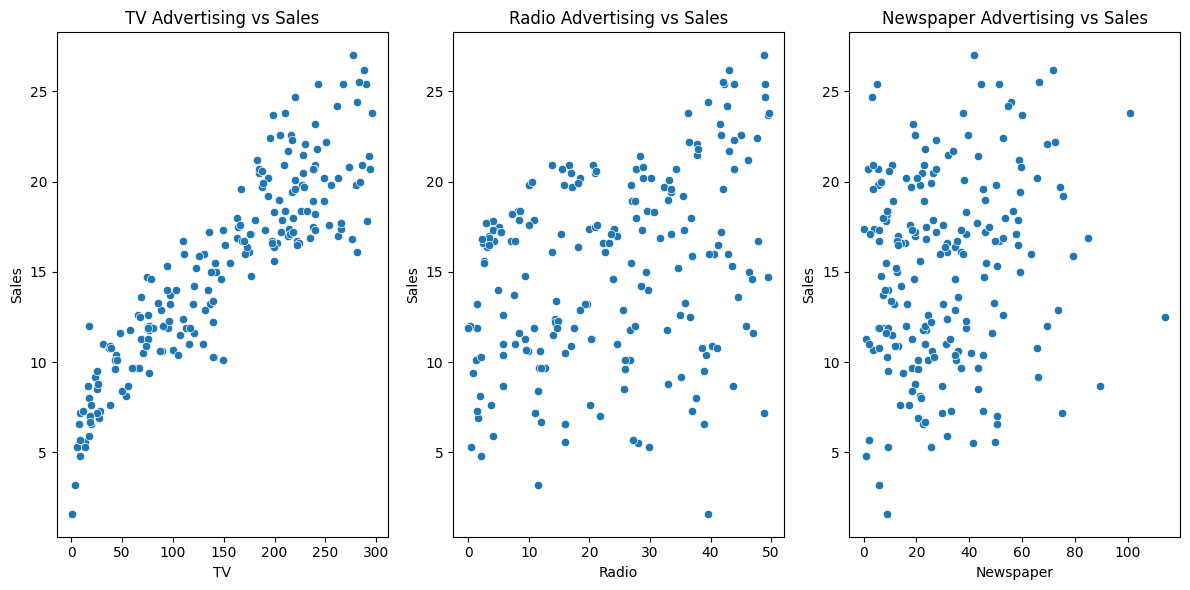

In [7]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Scatter plot of TV advertising vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV Advertising vs Sales')

# Scatter plot of Radio advertising vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title('Radio Advertising vs Sales')

# Scatter plot of Newspaper advertising vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Newspaper Advertising vs Sales')

# Show plots
plt.tight_layout()
plt.show()

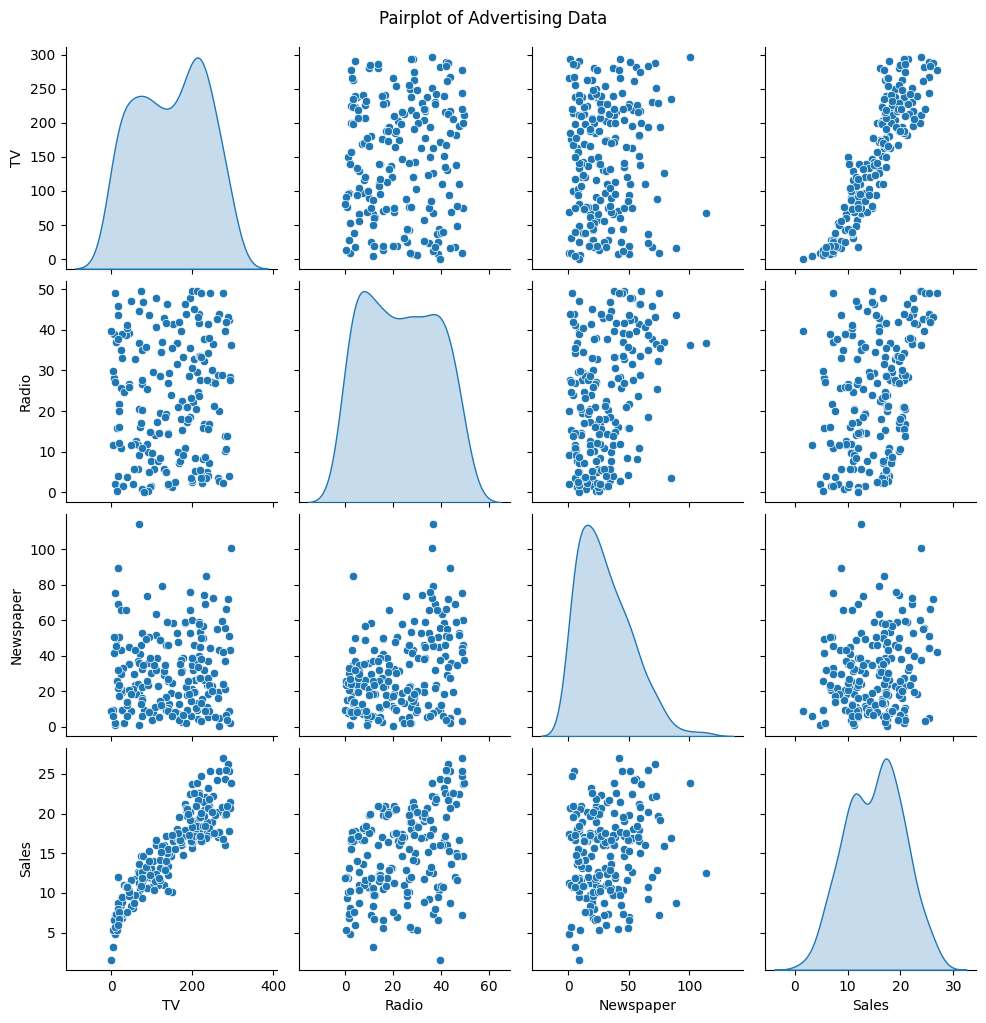

In [8]:
# Pairplot to visualize pairwise relationships
sns.pairplot(data, kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot of Advertising Data', y=1.02)
plt.show()

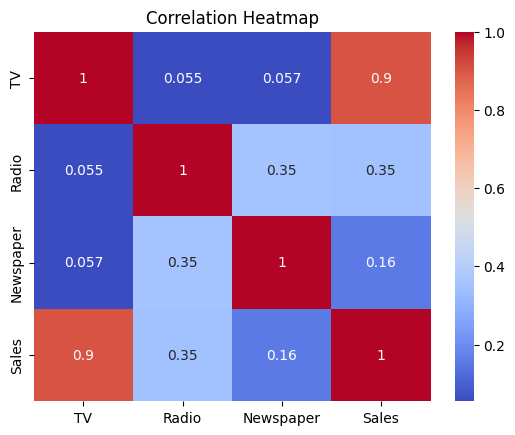

In [9]:
# Heatmap to visualize feature correlations
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
importance_scores = rf_model.feature_importances_

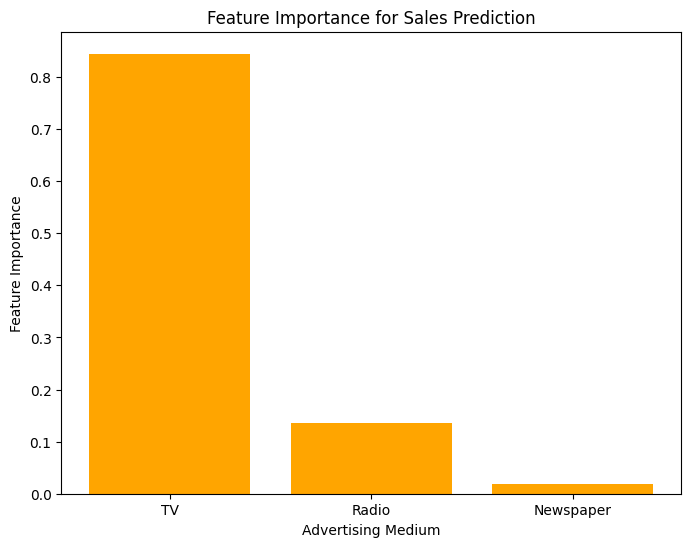

In [20]:
# Plotting feature importance
plt.figure(figsize=(8, 6))
plt.bar(X.columns, importance_scores, color='orange')
plt.xlabel('Advertising Medium')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Sales Prediction')
plt.show()

__From above graph we can understand that TV Advertising medium has larger impact on sales__

## Train_Test_split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Separate features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [13]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

In [16]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [17]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [18]:
y_pred

array([17.4155, 22.425 , 19.8375,  6.7945, 22.962 , 13.602 , 22.6805,
        9.5935, 16.88  , 16.84  ,  7.471 , 10.101 , 17.3645,  4.9575,
       11.5385, 16.955 ,  6.478 , 17.5785, 11.6035, 19.804 , 19.934 ,
       13.258 , 10.066 , 21.7675, 10.9915,  9.876 , 22.776 , 12.538 ,
       11.4635,  5.216 , 16.6045, 11.1005, 22.968 , 10.077 , 19.801 ,
       20.184 , 10.9605, 19.6225, 12.4875,  7.463 ])

## Evaluating the model

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)

In [23]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.3991268375000003


In [25]:
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"R-squared Score: {r2}")

R-squared Score: 0.9547224261434059


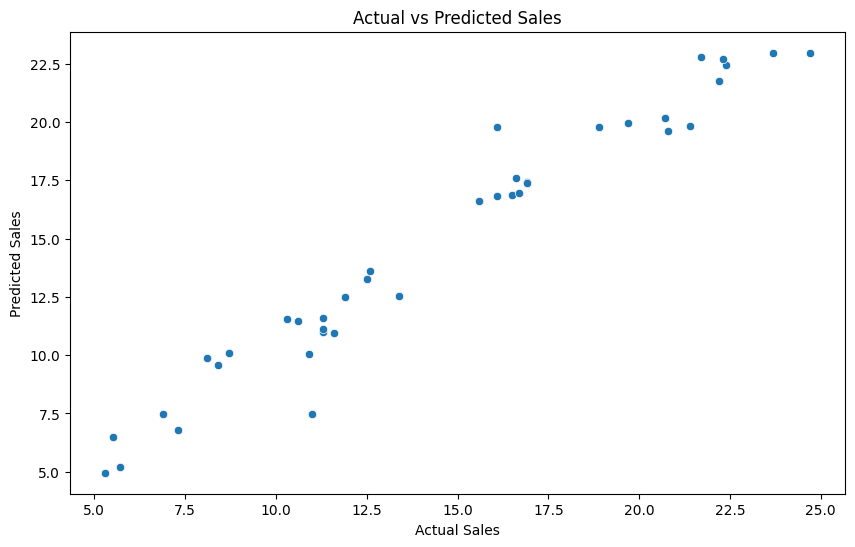

In [27]:
# Visualize actual vs predicted sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [28]:
# Example prediction
new_data = [[100, 20, 30]]  # Example: TV=100, Radio=20, Newspaper=30

In [29]:
predicted_sales = rf_model.predict(new_data)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [30]:
print(f"Predicted Sales for new data: {predicted_sales[0]}")

Predicted Sales for new data: 12.622500000000025


In [31]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Making Prediction of sales

In [32]:
# extracting fourth row of data
actual_sales = data.iloc[3]
actual_sales

TV           151.5
Radio         41.3
Newspaper     58.5
Sales         16.5
Name: 3, dtype: float64

In [33]:
# Displaying Actual Sales of data
actual_sales = data.iloc[3]['Sales']
print("Actual Sales:", actual_sales)

Actual Sales: 16.5


In [34]:
# Predict the sales using above model
new_data = [[151.5, 41.3, 58.5 ]]  # Example: TV=151.5, Radio=41.3, Newspaper=58.5

In [35]:
predicted_sales = rf_model.predict(new_data)
print(f"Predicted Sales for new data: {predicted_sales[0]}")

Predicted Sales for new data: 16.598999999999997


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Conclusion:
__From Actual Sales and Predicted sales we can conclude that model is build successfully and it can predict the sales accurately__